<a href="https://colab.research.google.com/github/dana-prthv/ORINSON-INTERNSHIP/blob/main/Orinson_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/population.csv'
data = pd.read_csv(file_path)

print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Year  Yearly % \nChange  Yearly\nChange  Migrants (net)  Median Age  \
0  2050               0.23         3711367             NaN        38.1   
1  2045               0.35         5585537       -414772.0        36.6   
2  2040               0.50         7793541       -415736.0        35.0   
3  2035               0.66        10016298       -415732.0        33.3   
4  2030               0.80        11726140       -440124.0        31.7   

   Fertility Rate  Density (P/Km²)  Urban\nPop %  Urban Population  \
0            2.24              551          53.5         876613025   
1            2.24              545          50.1         811749463   
2            2.24              536          46.7         744380367   
3            2.24              523          43.5         675456367   
4            2.24              506          40.4         607341981   

   Co

In [ ]:
features = ['Year', 'Density (P/Km²)', 'Median Age', 'Urban Population']  # Example features
X = data[features]
y = data['Population']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Multiple Linear Regression - Mean Squared Error: {mse}")
print(f"Multiple Linear Regression - R^2 Score: {r2}")

Multiple Linear Regression - Mean Squared Error: 1533098516985.0867
Multiple Linear Regression - R^2 Score: 0.9999868502752735


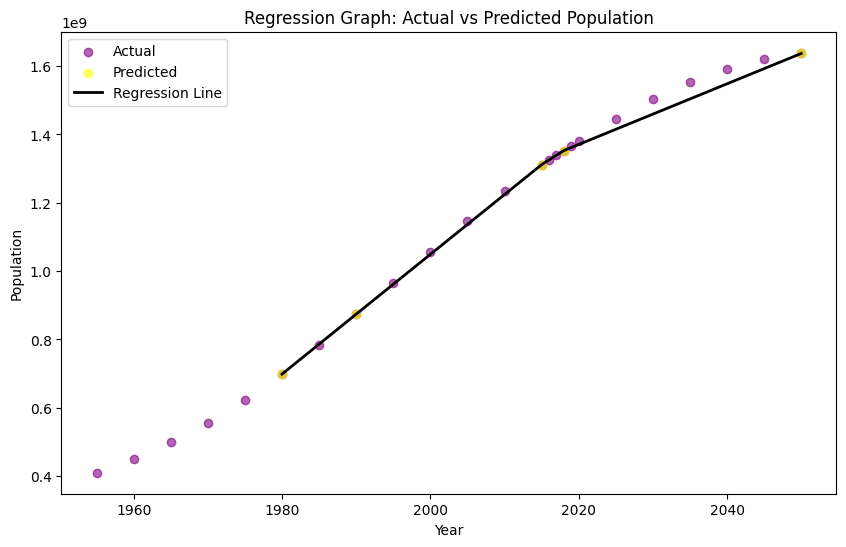

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Population'], color='purple', alpha=0.6, label='Actual')
plt.scatter(data['Year'][y_test.index], y_pred, color='yellow', alpha=0.6, label='Predicted')
sorted_indices = X_test[:, 0].argsort()
plt.plot(data['Year'][y_test.index].iloc[sorted_indices], y_pred[sorted_indices], color='black', linewidth=2, label='Regression Line')

plt.title('Regression Graph: Actual vs Predicted Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()


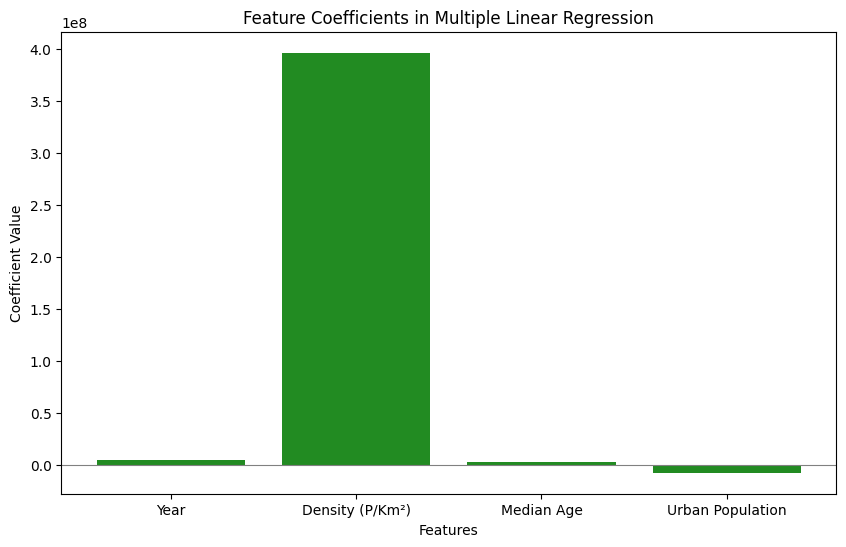

In [ ]:
coefficients = model.coef_
features_and_coefficients = dict(zip(features, coefficients))

plt.figure(figsize=(10, 6))
plt.bar(features_and_coefficients.keys(), features_and_coefficients.values(), color='forestgreen')
plt.title('Feature Coefficients in Multiple Linear Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='grey', linewidth=0.8)
plt.show()

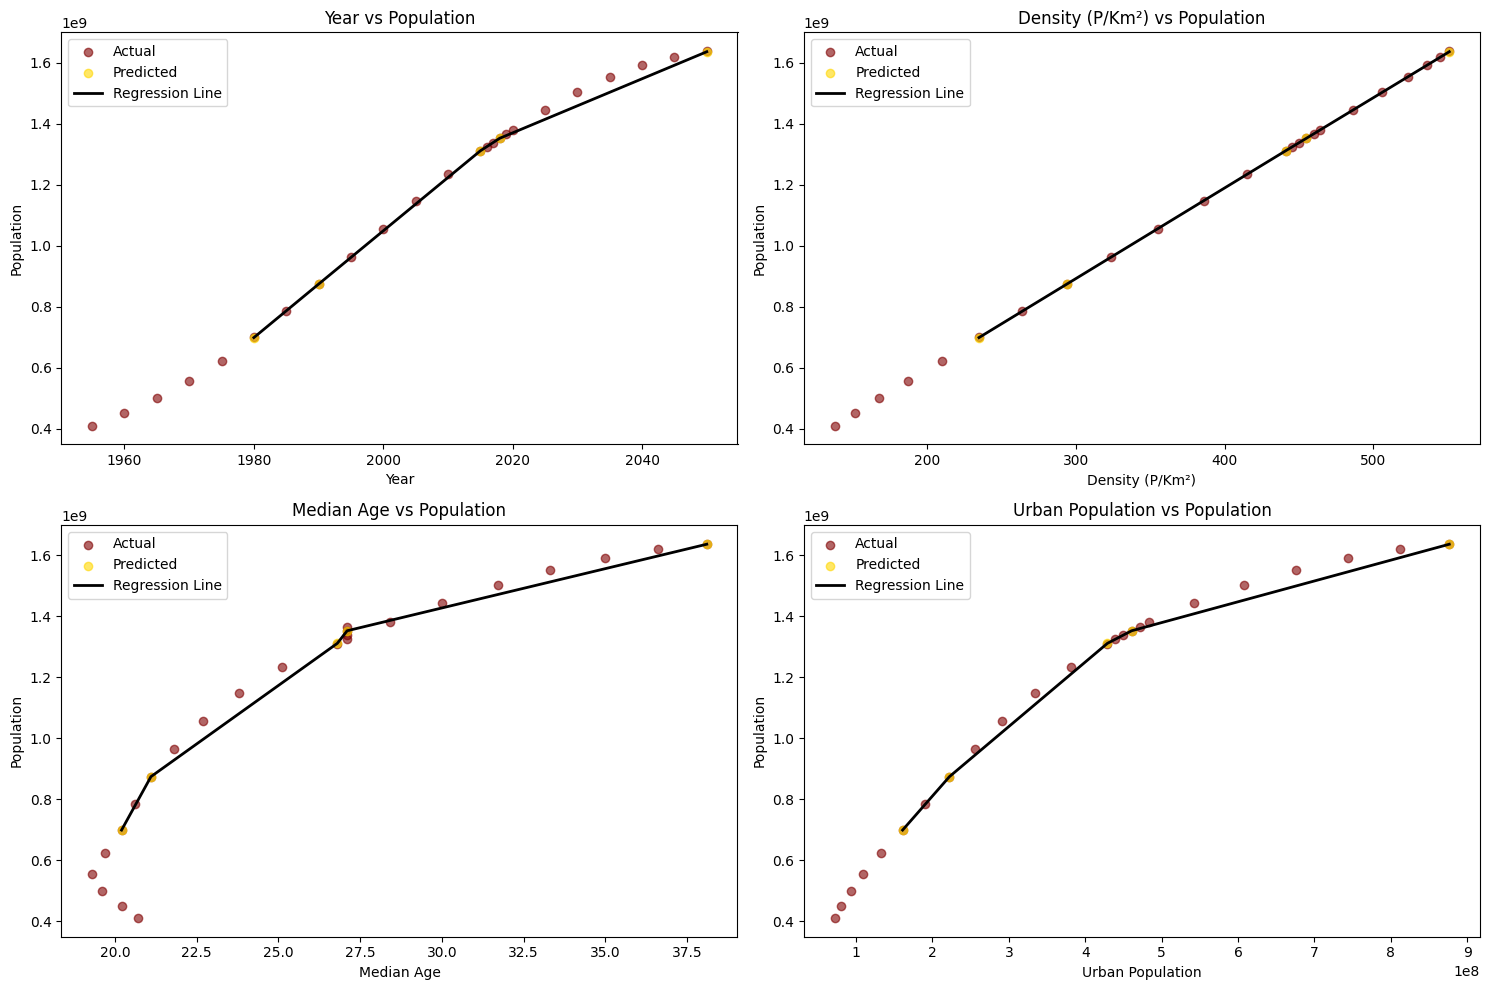

In [ ]:
#Graph representation of impact of each feature on the target variable using scatter plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    axs[row, col].scatter(data[feature], data['Population'], color='maroon', alpha=0.6, label='Actual')

    axs[row, col].scatter(data[feature][y_test.index], y_pred, color='gold', alpha=0.6, label='Predicted')
    axs[row, col].plot(data[feature][y_test.index].sort_values(), np.sort(y_pred), color='black', linewidth=2, label='Regression Line')

    axs[row, col].set_title(f'{feature} vs Population')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Population')
    axs[row, col].legend()

plt.tight_layout()
plt.show()
